# Importação e clonagem do git

In [4]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import joblib
import sys
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, recall_score, f1_score, confusion_matrix, roc_auc_score, \
    accuracy_score, roc_curve, precision_recall_curve, average_precision_score, ConfusionMatrixDisplay

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.preprocessing import prepare_data

X_train, X_test, y_train, y_test, preprocessor = prepare_data("../Data/heart.csv")
from src.preprocessing import prepare_data


## Leitura dos Dados

In [5]:

X_test = pd.read_csv("../Data/X_test (1).csv")
Y_test = pd.read_csv("../Data/y_test (1).csv")

# Carregamento do Modelo


Utilizamos a biblioteca joblib porque o modelo foi estruturado como um objeto do scikit-learn (Pipeline). O joblib é a alternativa mais funcional para serializar esse tipo de objeto, permitindo salvar e carregar o modelo completo sem a necessidade de redefinir as etapas de pré-processamento.

In [6]:
modelo = joblib.load("../Model/model.joblib")

In [7]:
# 1. Defina quantos pacientes você quer sortear
n_pacientes = 5

# 2. Sorteia os pacientes aleatórios do X_test
amostra_pacientes = X_test.sample(n=n_pacientes)

print(f"--- ANALISANDO {n_pacientes} PACIENTES ALEATÓRIOS ---\n")

# 3. Itera sobre a amostra
for i in range(len(amostra_pacientes)):
    # Pega uma linha da amostra
    paciente = amostra_pacientes.iloc[i:i+1]
    idx_original = amostra_pacientes.index[i]

    # Inferência
    pred = modelo.predict(paciente)[0]
    prob = modelo.predict_proba(paciente)[0][1]

    # Busca o valor real no Y_test usando o índice original
    real = Y_test.loc[idx_original].item()

    status = "ACERTO" if pred == real else "ERRO"

    print(f"ID Original: {idx_original} | Pred: {pred} | Real: {real} | Prob: {prob:.2%} | {status}")

--- ANALISANDO 5 PACIENTES ALEATÓRIOS ---

ID Original: 112 | Pred: 0 | Real: 0 | Prob: 5.14% | ACERTO
ID Original: 37 | Pred: 1 | Real: 1 | Prob: 98.59% | ACERTO
ID Original: 143 | Pred: 1 | Real: 0 | Prob: 81.29% | ERRO
ID Original: 129 | Pred: 0 | Real: 0 | Prob: 1.92% | ACERTO
ID Original: 107 | Pred: 0 | Real: 1 | Prob: 2.98% | ERRO


Fizemos uma pequena análise de 5 pacientes aleatórios no intuito de testar a predição do nosso modelo. Foi identificado uma precisão nas predição em cerca  de 60%. Logo foi levado em conta uma maneira de contornar esse problema de integridade.

# Novos dados gerados por I.A
- Para verificar a integridade e a capacidade de generalização do modelo, geramos um conjunto de dados inéditos (não utilizados nas etapas de treinamento ou validação). Esses dados foram gerados sinteticamente com o auxílio do DeepSeek e submetidos ao modelo para validar a consistência das predições em cenários totalmente novos.

In [8]:

pacientes = [
    ({'Age':25, 'Sex':'M', 'ChestPainType':'NAP', 'RestingBP':110, 'Cholesterol':165,
      'FastingBS':0, 'RestingECG':'Normal', 'MaxHR':195, 'ExerciseAngina':'N',
      'Oldpeak':0.2, 'ST_Slope':'Up'}, 0),

    ({'Age':72, 'Sex':'F', 'ChestPainType':'ATA', 'RestingBP':185, 'Cholesterol':380,
      'FastingBS':1, 'RestingECG':'LVH', 'MaxHR':95, 'ExerciseAngina':'Y',
      'Oldpeak':4.8, 'ST_Slope':'Down'}, 1),

    ({'Age':22, 'Sex':'F', 'ChestPainType':'NAP', 'RestingBP':105, 'Cholesterol':155,
      'FastingBS':0, 'RestingECG':'Normal', 'MaxHR':190, 'ExerciseAngina':'N',
      'Oldpeak':0.1, 'ST_Slope':'Up'}, 0),

    ({'Age':68, 'Sex':'M', 'ChestPainType':'ASY', 'RestingBP':170, 'Cholesterol':340,
      'FastingBS':1, 'RestingECG':'ST', 'MaxHR':110, 'ExerciseAngina':'Y',
      'Oldpeak':3.2, 'ST_Slope':'Flat'}, 1),

    ({'Age':45, 'Sex':'M', 'ChestPainType':'NAP', 'RestingBP':125, 'Cholesterol':190,
      'FastingBS':0, 'RestingECG':'Normal', 'MaxHR':165, 'ExerciseAngina':'N',
      'Oldpeak':0.8, 'ST_Slope':'Up'}, 0),

    ({'Age':60, 'Sex':'F', 'ChestPainType':'ATA', 'RestingBP':155, 'Cholesterol':290,
      'FastingBS':0, 'RestingECG':'LVH', 'MaxHR':130, 'ExerciseAngina':'Y',
      'Oldpeak':2.5, 'ST_Slope':'Flat'}, 1),

    ({'Age':50, 'Sex':'M', 'ChestPainType':'TA', 'RestingBP':135, 'Cholesterol':230,
      'FastingBS':0, 'RestingECG':'Normal', 'MaxHR':155, 'ExerciseAngina':'N',
      'Oldpeak':1.0, 'ST_Slope':'Up'}, 0),

    ({'Age':58, 'Sex':'F', 'ChestPainType':'ASY', 'RestingBP':150, 'Cholesterol':260,
      'FastingBS':1, 'RestingECG':'ST', 'MaxHR':140, 'ExerciseAngina':'N',
      'Oldpeak':2.0, 'ST_Slope':'Flat'}, 1),

    ({'Age':35, 'Sex':'M', 'ChestPainType':'ATA', 'RestingBP':145, 'Cholesterol':300,
      'FastingBS':1, 'RestingECG':'Normal', 'MaxHR':160, 'ExerciseAngina':'Y',
      'Oldpeak':1.8, 'ST_Slope':'Flat'}, 1),

    ({'Age':70, 'Sex':'F', 'ChestPainType':'NAP', 'RestingBP':130, 'Cholesterol':200,
      'FastingBS':0, 'RestingECG':'Normal', 'MaxHR':145, 'ExerciseAngina':'N',
      'Oldpeak':0.9, 'ST_Slope':'Up'}, 0),
]



# Validação
- Nessa parte, estamos usando os dados sinteticos gerados no modelo e verificando se estão corretos

Paciente: SAUDÁVEL
Previsao: SAUDÁVEL
Resultado: Correto

Paciente: DOENTE
Previsao: DOENTE
Resultado: Correto

Paciente: SAUDÁVEL
Previsao: SAUDÁVEL
Resultado: Correto

Paciente: DOENTE
Previsao: DOENTE
Resultado: Correto

Paciente: SAUDÁVEL
Previsao: SAUDÁVEL
Resultado: Correto

Paciente: DOENTE
Previsao: DOENTE
Resultado: Correto

Paciente: SAUDÁVEL
Previsao: SAUDÁVEL
Resultado: Correto

Paciente: DOENTE
Previsao: DOENTE
Resultado: Correto

Paciente: DOENTE
Previsao: DOENTE
Resultado: Correto

Paciente: SAUDÁVEL
Previsao: SAUDÁVEL
Resultado: Correto

Acertos: 10/10 (100%)

Acurácia: 100.00%


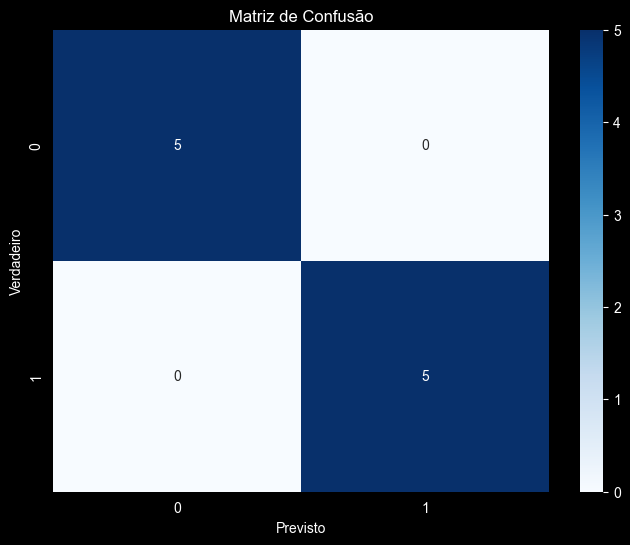


Relatório de Classificação:
              precision    recall  f1-score   support

    Saudável       1.00      1.00      1.00         5
      Doente       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



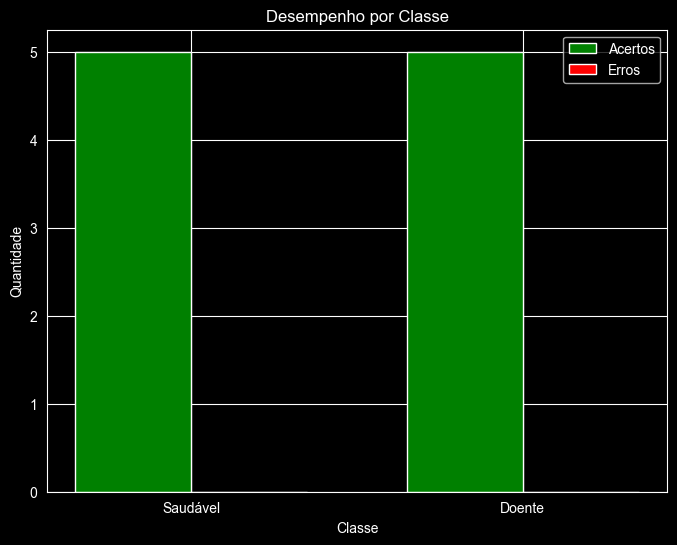

In [9]:
y_true = []
y_pred = []
acertos = 0

for dados, esperado in pacientes:
    previsao = modelo.predict(pd.DataFrame([dados]))[0]
    acertou = (previsao == esperado)

    print(f"Paciente: {'SAUDÁVEL' if esperado==0 else 'DOENTE'}")
    print(f"Previsao: {'SAUDÁVEL' if previsao==0 else 'DOENTE'}")
    print(f"Resultado: {'Correto' if acertou else 'Errado'}\n")

    y_true.append(esperado)
    y_pred.append(previsao)

    if acertou:
        acertos += 1

print(f"Acertos: {acertos}/{len(pacientes)} ({acertos/len(pacientes):.0%})")

# Métricas e gráficos
acuracia = accuracy_score(y_true, y_pred)
print(f"\nAcurácia: {acuracia:.2%}")

# Matriz de confusão
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_true, y_pred, target_names=['Saudável', 'Doente']))

# Gráfico de barras de acertos por classe
acertos_por_classe = [sum((y_true[i] == 0) and (y_pred[i] == 0) for i in range(len(y_true))),
                      sum((y_true[i] == 1) and (y_pred[i] == 1) for i in range(len(y_true)))]
erros_por_classe = [sum((y_true[i] == 0) and (y_pred[i] == 1) for i in range(len(y_true))),
                    sum((y_true[i] == 1) and (y_pred[i] == 0) for i in range(len(y_true)))]

fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
index = range(2)

bar1 = ax.bar(index, acertos_por_classe, bar_width, label='Acertos', color='green')
bar2 = ax.bar([i + bar_width for i in index], erros_por_classe, bar_width, label='Erros', color='red')

ax.set_xlabel('Classe')
ax.set_ylabel('Quantidade')
ax.set_title('Desempenho por Classe')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(['Saudável', 'Doente'])
ax.legend()

plt.show()

Após a adição de dados síntéticos, fizemos a validação do nosso modelo e analisamos o rendimento do nosso modelo por meio das seguintes métricas de validação: Precision, Recall, f1-score e support. E observamos os resultados com precisão em cerca de 100%, o que indica uma melhora do rendimento do nosso modelo após as alterações.